# Kaggle Competition:  Iceberg or Ship

# resnext50 architecture 

## start with image size of 75, increase epochs, update size recurrently


---
## Import libraries

In [1]:
!ls -l

total 5040
-rw-rw-r-- 1 ubuntu ubuntu 1405706 Jan 15 01:35 1b_getdata-csv.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  625023 Jan 14 18:47 1_getdata.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  245619 Jan 14 18:36 2_model_resnet34.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   13742 Jan 15 01:35 3_model_resnext50.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   14220 Jan 13 21:14 4_model_nasnet.ipynb
-rw-rw-r-- 1 ubuntu ubuntu   64965 Jan 14 19:40 4_resnext_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  147078 Jan 14 19:57 5_resnet18_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  138629 Jan 14 19:52 6_resnext50_resize.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  205624 Jan 20 20:02 7_1_resnext50_more_epoch_submitted.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  210001 Jan 15 18:51 7_2_resnext50_more_epoch.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  254485 Jan 20 19:51 7_5_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  253300 Jan 20 20:00 7_6_resnext50_more_epoch_update_sz.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  251697 Jan 20 20:08 7_7_resnext50_more_epoch_update_sz

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
import shutil
from IPython.display import FileLink, FileLinks

from sklearn.model_selection import train_test_split
import helper

In [5]:
#PATH = "/home/nidhin/data/iceberg/"
PATH = os.path.expanduser("~/data/iceberg/")

In [6]:
!ls -l {PATH}

total 1973264
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan  9 00:38 models
-rw-rw-r--  1 ubuntu ubuntu     117951 Oct 23 17:27 sample_submission.csv
-rw-rw-r--  1 ubuntu ubuntu      38566 Jan  7 20:36 sample_submission.csv.7z
drwxrwxr-x  2 ubuntu ubuntu       4096 Jan 20 19:56 sub
drwxrwxr-x  2 ubuntu ubuntu     274432 Jan 14 18:44 test
-rw-rw-r--  1 ubuntu ubuntu 1521771850 Oct 23 17:27 test.json
-rw-rw-r--  1 ubuntu ubuntu  257127394 Jan  7 20:36 test.json.7z
drwxrwxr-x 13 ubuntu ubuntu       4096 Jan 15 16:52 tmp
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 train
-rw-rw-r--  1 ubuntu ubuntu  196313674 Oct 23 17:23 train.json
-rw-rw-r--  1 ubuntu ubuntu   44932785 Jan  7 20:36 train.json.7z
drwxrwxr-x  4 ubuntu ubuntu       4096 Jan 14 18:43 valid


In [7]:
np.random.seed(0)

## Set Architecture

In [9]:
arch=resnext50
sz=75
bs=32
lr = 0.0075

In [10]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.10)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

data = get_data(sz, bs)
data = data.resize(int(sz*1.5), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [11]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test',)

learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.55)

### Learning Rate Finder

In [12]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 59%|█████▊    | 24/41 [00:00<00:00, 25.30it/s, loss=3.75] 


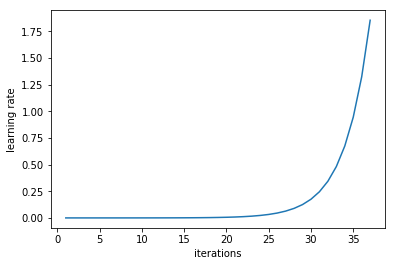

In [13]:
learn.sched.plot_lr()

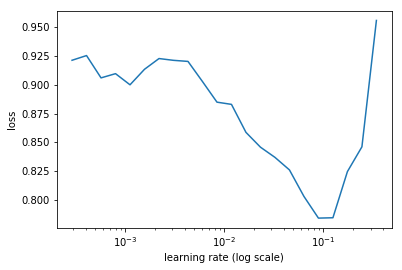

In [14]:
learn.sched.plot() 

In [15]:
learn.fit(lr, 9)
learn.precompute=False

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

[0.      0.56242 0.42304 0.74148]                          
[1.      0.54477 0.44945 0.71875]                          
[2.      0.47914 0.46782 0.75   ]                          
[3.      0.47397 0.45006 0.71875]                          
[4.      0.44333 0.43626 0.74432]                          
[5.      0.41688 0.3968  0.82102]                          
[6.      0.3809  0.37042 0.84091]                          
[7.      0.36076 0.42916 0.73864]                          
[8.      0.39199 0.38693 0.80682]                          



### Stochastic Gradient Descent with Restart

In [16]:
lr = 0.0075

In [17]:
#learn.fit(lr, 4, cycle_len=2)
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.51907 0.38319 0.80966]                          
[1.      0.48204 0.44843 0.79829]                          
[2.      0.48863 0.45106 0.77841]                          
[3.      0.51176 0.43457 0.77841]                          
[4.      0.4935  0.43922 0.77273]                          
[5.      0.45966 0.40876 0.79829]                          
[6.      0.45424 0.41283 0.78409]                          
[7.      0.45797 0.41646 0.78409]                          
[8.      0.46156 0.47076 0.79546]                          
[9.      0.45666 0.44177 0.79546]                          
[10.       0.47594  0.41098  0.78977]                      
[11.       0.45665  0.42974  0.79546]                      
[12.       0.43958  0.4095   0.80114]                      
[13.       0.43123  0.41563  0.80682]                      
[14.       0.41881  0.39209  0.80398]                      
[15.       0.43531  0.41248  0.78977]                      
[16.       0.4345   0.50213  0.77273]   

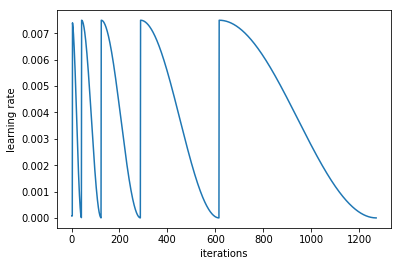

In [18]:
learn.sched.plot_lr()

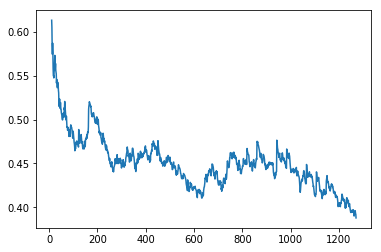

In [19]:
learn.sched.plot_loss()

In [20]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.3312608037389016, 0.8473520249221184)

In [21]:
# lr/10

In [22]:
# lr/9

In [23]:
# lr/3

In [24]:
# lr/4

### Unfreeze Layers

In [25]:
# unfreeze layers
learn.unfreeze()
#lrs = np.array([lr/15,lr/12,lr/9])
lrs = np.array([lr/9,lr/3,lr/1])

#wd = 0.025
#wds=[wd/100, wd/10, wd]
#wds=[0.0025,0.025,0.25]


### Run Learner Again

In [26]:
learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2,use_wd_sched=True,wds=wds)

HBox(children=(IntProgress(value=0, description='Epoch', max=31), HTML(value='')))

[0.      0.54938 0.39896 0.8125 ]                          
[1.      0.47224 0.34769 0.83807]                          
[2.      0.4341  0.39728 0.81534]                          
[3.      0.46143 0.31685 0.86648]                          
[4.      0.44943 0.44277 0.80682]                          
[5.      0.42375 0.39309 0.83239]                          
[6.      0.37432 0.33989 0.82954]                          
[7.      0.40852 0.30241 0.85796]                          
[8.      0.41929 0.31326 0.86364]                          
[9.      0.39248 0.30323 0.86079]                          
[10.       0.34353  0.33148  0.85511]                      
[11.       0.35365  0.30848  0.86932]                      
[12.       0.34072  0.34968  0.83807]                      
[13.       0.29897  0.30166  0.86079]                      
[14.       0.27892  0.30171  0.87216]                      
[15.       0.30944  0.28479  0.875  ]                      
[16.       0.30373  0.26455  0.87784]   

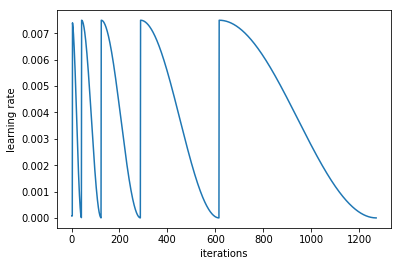

In [27]:
learn.sched.plot_lr()

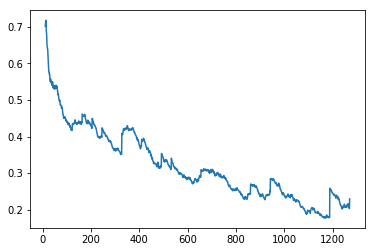

In [28]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [29]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.2561366987204415, 0.8940809968847352)

## Resize the images

In [30]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.10)
    data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs,test_name='test')
    return data

## Image Size of 128

In [31]:
#train for image size 128x128
learn.set_data(get_data(128, 32))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.34379 0.33943 0.87784]                          
[1.      0.34459 0.28739 0.88636]                          
[2.      0.33771 0.30033 0.875  ]                          
[3.      0.37517 0.28591 0.875  ]                          
[4.      0.39808 0.27198 0.875  ]                          
[5.      0.35971 0.2688  0.88636]                          
[6.      0.36692 0.27242 0.88636]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.4083  0.3132  0.87784]                          
[1.      0.39959 0.26961 0.90057]                          
[2.      0.32734 0.27795 0.86648]                          
[3.      0.33392 0.30541 0.84091]                          
[4.      0.2975  0.29386 0.85796]                          
[5.      0.26541 0.27222 0.86932]                          
[6.      0.25344 0.21916 0.91761]                          



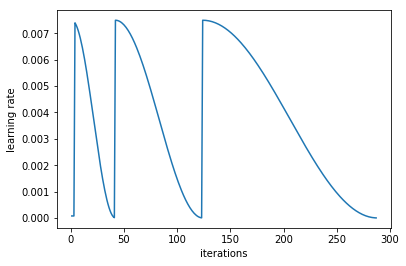

In [32]:
learn.sched.plot_lr()

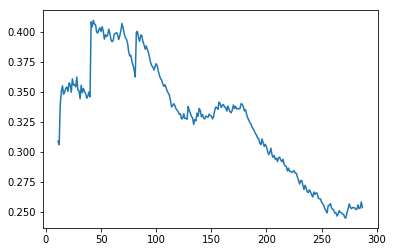

In [33]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [34]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.22726159821349703, 0.9127725856697819)

In [35]:
learn.save('resnext50_sz75_zm15_sequ')
learn.load('resnext50_sz75_zm15_sequ')

In [36]:
helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_zm15_sequ.csv')

---
## Image Size of 150

In [37]:
#train for image size 150 x 150
learn.set_data(get_data(150, 16))

learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

learn.unfreeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.25972 0.26276 0.90774]                          
[1.      0.2348  0.27164 0.90476]                          
[2.      0.23372 0.25584 0.90774]                          
[3.      0.24964 0.27537 0.88691]                          
[4.      0.24289 0.28074 0.88393]                          
[5.      0.2554  0.27133 0.88988]                          
[6.      0.27064 0.25434 0.90476]                          



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.35281 0.32082 0.85714]                          
[1.      0.38489 0.45948 0.79762]                          
[2.      0.36389 0.32876 0.86905]                          
[3.      0.36407 0.35657 0.84821]                          
[4.      0.34956 0.40002 0.83036]                          
[5.      0.30501 0.21962 0.90774]                          
[6.      0.27121 0.26339 0.88691]                          



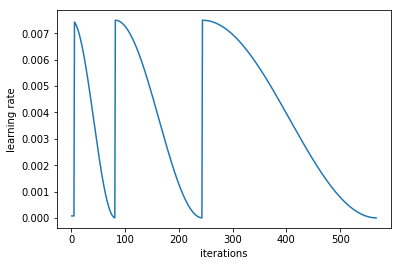

In [38]:
learn.sched.plot_lr()

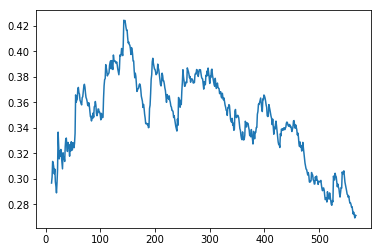

In [39]:
learn.sched.plot_loss()

## Log Loss | Accuracy

In [40]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),axis=0)
(metrics.log_loss(y,preds), accuracy(preds,y))

(0.23483152540365582, 0.9127725856697819)

---
## Save learner

In [ ]:
learn.save('resnext50_sz75_sequ')

In [ ]:
learn.load('resnext50_sz75_sequ')

## Output predictions to csv file

In [ ]:
helper.make_submission(learn=learn, data=data, output_file_name = f'{PATH}sub/resnext50_sz75_sequ.csv')

# END FILE

### Run Learner again

In [ ]:
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [ ]:
#learn.sched.plot_loss()

In [ ]:
# log_preds,y = learn.TTA()
# preds = np.mean(np.exp(log_preds),axis=0)
# (metrics.log_loss(y,preds), accuracy(preds,y))

### Run Learner again

In [ ]:
#learn.fit(lrs, 5, cycle_len=1, cycle_mult=2)

In [ ]:
#learn.sched.plot_loss()

## Log Loss | Accuracy (final model here)

In [ ]:
# log_preds,y = learn.TTA()
# preds = np.mean(np.exp(log_preds),axis=0)
# (metrics.log_loss(y,preds), accuracy(preds,y))

## Save predictions

In [ ]:
# test_df = pd.read_json(PATH+"/test.json")
# helper.make_test_file(log_preds,test_df,model_name='resnext50_sz75_zm15_bs32_comp_band',
#                       classes=data.classes,
#                       submission_folder =f'{PATH}sub'
#                      )